# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [1]:
# %pip install pandas
# %pip install 'SQLAlchemy==1.4.46'
# %pip install SQLAlchemy


## Load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_2018 = pd.read_sql_table('fahraddverkehr_2018', 'sqlite:///data/verkehrszaehlungen.sqlite')
df_2022 = pd.read_sql_table('fahraddverkehr_2022', 'sqlite:///data/verkehrszaehlungen.sqlite')

df_2018 = df_2018.drop(df_2018.index[-1])

### Look at the first rows

In [3]:
df_2018.head(10)
df_2022.head(10)

,Zeit,Weseler Straße,Weseler Straße FR stadteinwärts,Weseler Straße FR stadtauswärts,Wetter,Temperatur (°C),Luftfeuchtigkeit (%),Regen (mm),Wind (km/h)
0,2022-01-01 00:00:00,22.0,8.0,14.0,Bedeckt,12.0,81.0,0.0,31.0
1,2022-01-01 01:00:00,45.0,22.0,23.0,Bedeckt,12.0,82.0,0.0,29.0
2,2022-01-01 02:00:00,52.0,34.0,18.0,Bedeckt,11.0,84.0,0.0,28.0
3,2022-01-01 03:00:00,61.0,34.0,27.0,Bedeckt,11.0,85.0,0.0,26.0
4,2022-01-01 04:00:00,51.0,28.0,23.0,Bedeckt,11.0,86.0,0.0,24.0
5,2022-01-01 05:00:00,19.0,11.0,8.0,Bedeckt,11.0,87.0,0.0,22.0
6,2022-01-01 06:00:00,20.0,9.0,11.0,Bedeckt,11.0,88.0,0.0,20.0
7,2022-01-01 07:00:00,10.0,4.0,6.0,Bedeckt,11.0,87.0,0.0,20.0
8,2022-01-01 08:00:00,10.0,9.0,1.0,Bedeckt,11.0,87.0,0.0,20.0
9,2022-01-01 09:00:00,17.0,14.0,3.0,Bedeckt,12.0,86.0,0.0,20.0


## Data exploration
### Exploration Data 2018


In [4]:
#Print information about the data for 2018

#MinimumMaximum (conclude) + at what time
#DataTypes
#summary statistics of numerical columns
#Total Average of counted cyclist (conclude)
#Average cyclist per street (conclude)
#Average per street
#Correlation between number of cyclist and Regen in mm
#Correlation between number of cyclist and Temperature in °
#Represent graphically the evolution of the number of cyclists between 2018 and 2022

df_2018.info()
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zeit                             8759 non-null   object 
 1   Weseler Straße (gesamt)          8759 non-null   int64  
 2   Weseler Straße FR stadteinwärts  8759 non-null   float64
 3   Weseler Straße FR stadtauswärts  8759 non-null   float64
 4   Wetter                           8759 non-null   object 
 5   Temperatur (°C)                  8759 non-null   float64
 6   Luftfeuchtigkeit (%)             8759 non-null   float64
 7   Gefühlte Temperatur (°C)         8759 non-null   float64
 8   Regen (mm)                       8759 non-null   float64
 9   Wind (km/h)                      8759 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 684.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data column

In [5]:
#maximum values and analyse at what time (2018 and 2022)


#max count 2018 + time
max_2018 = df_2018["Weseler Straße (gesamt)"].max()
max_count_time_2018 = df_2018["Weseler Straße (gesamt)"].idxmax()

#max count 2022 + time
max_2022 = df_2022["Weseler Straße"].max()
max_count_time_2022 = df_2022["Weseler Straße"].idxmax()
max_time = df_2022["Zeit"][max_count_time_2022]
timestamp = pd.Timestamp(max_time)
timestamp_str = str(timestamp)
print("Max amount of cyclist has been noticed at " + df_2018["Zeit"][max_count_time_2018] + " with " + str(max_2018) + " cyclists in 2018")
print("Max amount of cyclist has been noticed at " + timestamp_str + " with " + str(max_2022) + " cyclists in 2022")


Max amount of cyclist has been noticed at 27. Jun. 2018 15:00 with 741 cyclists in 2018
Max amount of cyclist has been noticed at 2022-10-25 07:00:00 with 497.0 cyclists in 2022


In [6]:
# Summary statistics
def calculate_percentage_difference(old_value, new_value):
    difference = new_value - old_value
    percentage_difference = (difference / old_value) * 100
    return percentage_difference

# print(df_2018["Weseler Straße (gesamt)"].describe())
# print("-------------------")
# print(df_2022["Weseler Straße"].describe())
avg_2018 = round(df_2018["Weseler Straße (gesamt)"].mean())
avg_2022 = round(df_2022["Weseler Straße"].mean())

print("Average Number of Cyclists in 2018 was: " + str(avg_2018))
print("Average Number of Cyclists in 2022 was: " + str(avg_2022))
print("The difference is about: " + str(round(calculate_percentage_difference(avg_2018, avg_2022))) + " %")


Average Number of Cyclists in 2018 was: 133
Average Number of Cyclists in 2022 was: 124
The difference is about: -7 %


                 Zeit  Weseler Straße 2018  Weseler Straße 2022
0  1. Jan. 2018 00:00                   19                 22.0
1  1. Jan. 2018 01:00                   35                 45.0
2  1. Jan. 2018 02:00                   49                 52.0
3  1. Jan. 2018 03:00                   37                 61.0
4  1. Jan. 2018 04:00                   24                 51.0


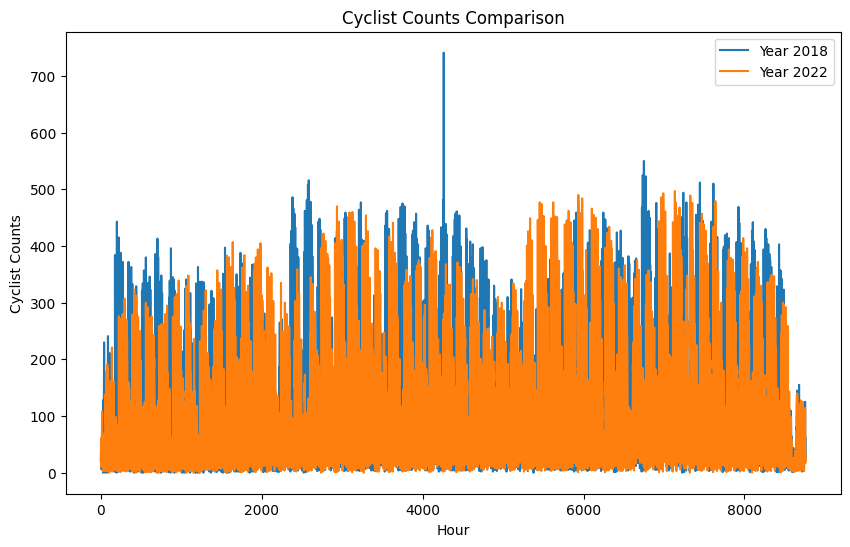

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#graphical comparision of the counting between 2018 and 2022 

columns_to_drop_2018 = []
columns_to_drop_2022 = []

for i in df_2018.columns:
    if i != "Weseler Straße (gesamt)" and i!= "Zeit":
        columns_to_drop_2018.append(i)

for i in df_2022.columns:
    if i != "Weseler Straße" and i!= "Zeit":
        columns_to_drop_2022.append(i)
        
df_2018_clean = df_2018.drop(columns=columns_to_drop_2018)
df_2018_clean = df_2018_clean.rename(columns={"Weseler Straße (gesamt)": "Weseler Straße 2018"})
df_2022_clean = df_2022.drop(columns=columns_to_drop_2022)
df_2022_clean = df_2022_clean.rename(columns={"Weseler Straße": "Weseler Straße 2022"})


merged_df = df_2018_clean.join(df_2022_clean["Weseler Straße 2022"])

# print(df_2022_clean.head())
# print(df_2018_clean.head())
print(merged_df.head())

# Perform comparison of each year
year_1_counts = merged_df["Weseler Straße 2018"]  # Get the cyclist counts for Year 2018
year_2_counts = merged_df["Weseler Straße 2022"]  # Get the cyclist counts for Year 2022


# Plotting the cyclist counts for each year
plt.figure(figsize=(10, 6))
plt.plot(year_1_counts, label="Year 2018")
plt.plot(year_2_counts, label="Year 2022")
plt.xlabel("Hour")
plt.ylabel("Cyclist Counts")
plt.title("Cyclist Counts Comparison")
plt.legend()
plt.show()











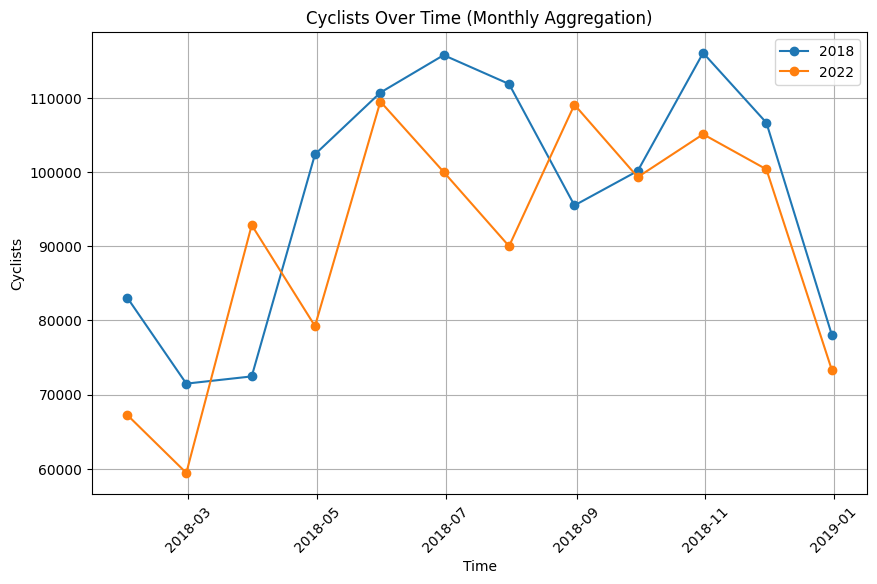

Initial Cyclist Count in 2018: 1164622
Final Cyclist Count in 2022: 1085829.0
Percentage Increase: -6.77%


In [23]:
month_mapping = {
    'Jan.': 'Jan',
    'Febr.': 'Feb',
    'Mrz.': 'Mar',
    'Apr.': 'Apr',
    'Mai': 'May',
    'Jun.': 'Jun',
    'Jul.': 'Jul',
    'Aug.': 'Aug',
    'Sept.': 'Sep',
    'Okt.': 'Oct',
    'Nov.': 'Nov',
    'Dez.': 'Dec'
}

merged_df['Zeit'] = pd.to_datetime(merged_df['Zeit'].replace(month_mapping, regex=True), format='%d. %b %Y %H:%M')

# Aggregate data by month and calculate the sum of cyclists
df_monthly = merged_df.groupby(pd.Grouper(key='Zeit', freq='M')).sum()

# Extract the relevant columns
time = df_monthly.index
cyclists_2018 = df_monthly['Weseler Straße 2018']
cyclists_2022 = df_monthly['Weseler Straße 2022']

# Basic analysis
initial_count = cyclists_2018.sum()
final_count = cyclists_2022.sum()
percentage_increase = ((final_count - initial_count) / initial_count) * 100

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(time, cyclists_2018, marker='o', label='2018')
plt.plot(time, cyclists_2022, marker='o', label='2022')
plt.xlabel('Time')
plt.ylabel('Cyclists')
plt.title('Cyclists Over Time (Monthly Aggregation)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Print the analysis results
print(f"Initial Cyclist Count in 2018: {initial_count}")
print(f"Final Cyclist Count in 2022: {final_count}")
print(f"Percentage Increase: {percentage_increase:.2f}%")


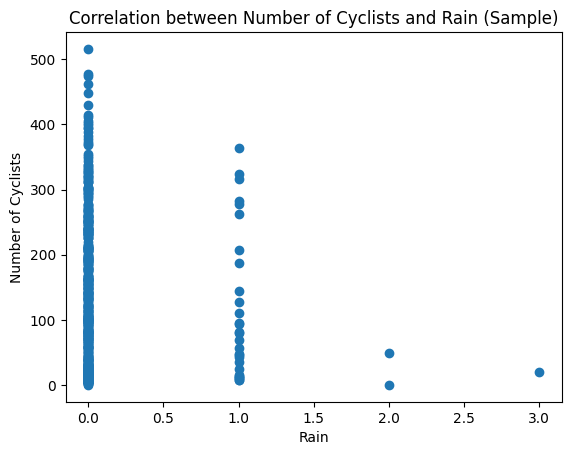

In [15]:
#Correlation between number of cyclists and rain situation
import random
columns_to_drop_2018 = []
columns_to_drop_2022 = []

for i in df_2018.columns:
    if i != "Weseler Straße (gesamt)" and i!= "Zeit" and i!= "Regen (mm)":
        columns_to_drop_2018.append(i)

for i in df_2022.columns:
    if i != "Weseler Straße" and i!= "Zeit" and i!= "Regen (mm)":
        columns_to_drop_2022.append(i)

df_2018_corr = df_2018.drop(columns=columns_to_drop_2018)
df_2022_corr = df_2022.drop(columns=columns_to_drop_2022)


cyclists = df_2018_corr['Weseler Straße (gesamt)']
rain = df_2018_corr['Regen (mm)']

# Set the random seed for reproducibility
random.seed(42)

# Randomly select a sample from the dataset
sample_size = 500  # Adjust the sample size as desired
indices = random.sample(range(len(df_2018_corr)), sample_size)
sample_cyclists = cyclists[indices]
sample_rain = rain[indices]

# Create a scatter plot of the sample
plt.scatter(sample_rain, sample_cyclists)
plt.xlabel('Rain')
plt.ylabel('Number of Cyclists')
plt.title('Correlation between Number of Cyclists and Rain (Sample)')
plt.show()




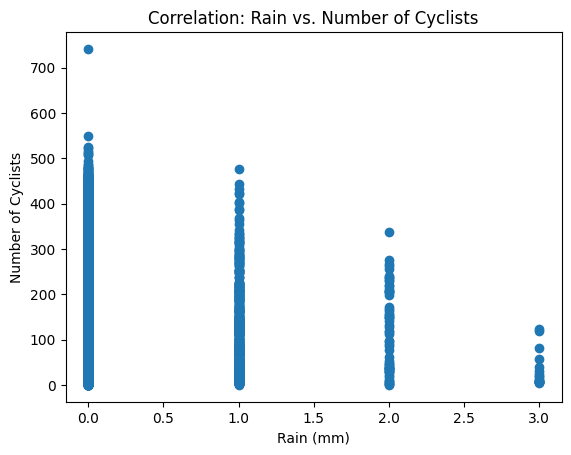

In [22]:
#Easy scatter plot correlation 

plt.scatter(df_2018_corr['Regen (mm)'], df_2018_corr['Weseler Straße (gesamt)'])
plt.xlabel('Rain (mm)')
plt.ylabel('Number of Cyclists')
plt.title('Correlation: Rain vs. Number of Cyclists')
plt.show()

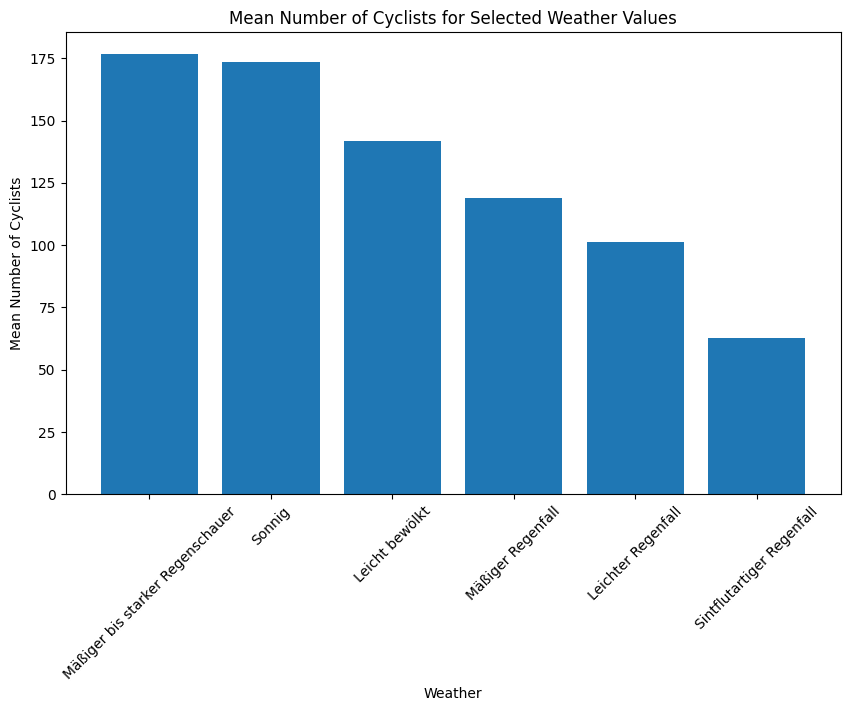

In [33]:
sampled_df = df_2018.sample(n=1000)

# Define the specific weather values you want to include in the plot
selected_weather_values = ['Sonnig', "Mäßiger Regenfall", "Leichter Regenfall", 'Mäßiger bis starker Regenschauer', 'Leicht bewölkt', "Sintflutartiger Regenfall"]

# Filter the data for the selected weather values
filtered_df = sampled_df[sampled_df['Wetter'].isin(selected_weather_values)]

# Group the filtered data by weather and calculate the mean number of cyclists for each weather category
grouped_data = filtered_df.groupby('Wetter')['Weseler Straße (gesamt)'].mean().reset_index()

# Sort the data based on the mean number of cyclists in descending order
grouped_data = grouped_data.sort_values(by='Weseler Straße (gesamt)', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Wetter'], grouped_data['Weseler Straße (gesamt)'])
plt.xlabel('Weather')
plt.ylabel('Mean Number of Cyclists')
plt.title('Mean Number of Cyclists for Selected Weather Values')
plt.xticks(rotation=45)
plt.show()


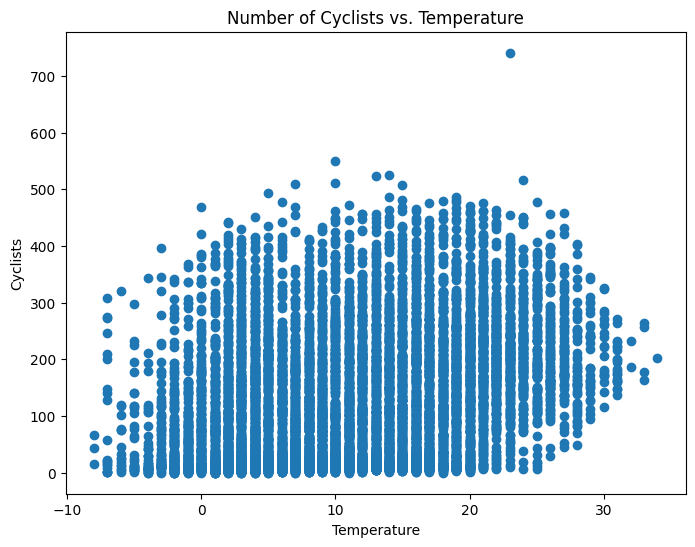

In [24]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_2018, x='Temperatur (°C)', y='Weseler Straße (gesamt)', cmap='Blues', shade=True)
plt.xlabel('Temperature')
plt.ylabel('Cyclists')
plt.title('Number of Cyclists vs. Temperature (Density Plot)')
plt.show()